<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/JPL-Caltech/Paper2025/StellarMassVsPlanetOrbit_SingleHost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import division

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import warnings
from google.colab import drive

In [3]:
pd.options.mode.copy_on_write = True
warnings.filterwarnings("ignore")

In [4]:
# Constants and methods for plotting graphs

# Mapping from exoplanet type to the corresponding color in the plotting graph
exoplanet_type_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan'
}

# Mapping from exoplanet type to the corresponding legend title in the plotting graph
exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants (1274 in total)',
    'Neptune-Like': 'Neptune Like Planets (1703 in total)',
    'Super-Earth': 'Super Earths (1511 in total)',
    'Terrestrial': 'Terrestrial Planets (173 in total)'
}

planetary_system_exoplanet_type_labels = {
    'Gas-Giant': 'Gas Giants',
    'Neptune-Like': 'Neptune Like Planets',
    'Super-Earth': 'Super Earths',
    'Terrestrial': 'Terrestrial Planets'
}

solar_system_planets_colors = {
    'Mercury': 'gray',
    'Venus': 'goldenrod',
    'Earth': 'royalblue',
    'Mars': 'orangered',
    'Jupiter': 'peru',
    'Saturn': 'gold',
    'Uranus': 'powderblue',
    'Neptune': 'deepskyblue'
}

solar_system_planets_labels = {
    'Mercury': 'Mercury',
    'Venus': 'Venus',
    'Earth': 'Earth',
    'Mars': 'Mars',
    'Jupiter': 'Jupiter',
    'Saturn': 'Saturn',
    'Uranus': 'Uranus',
    'Neptune': 'Neptune'
}

exoplanet_type_with_hz_colors = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime'
}

exoplanet_type_with_hz_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_colors_with_earth = {
    'Gas-Giant': 'wheat',
    'Neptune-Like': 'lightsteelblue',
    'Super-Earth': 'salmon',
    'Terrestrial': 'cyan',
    'HabitableZone-Planets': 'lime',
    'Earth': 'lime'
}

exoplanet_type_with_hz_labels_with_earth = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)',
    'Earth': 'Earth'
}

exoplanet_type_with_hz_zone_inner_colors = {
    'Gas-Giant': 'red',
    'Neptune-Like': 'red',
    'Super-Earth': 'red',
    'Terrestrial': 'red',
    'HabitableZone-Planets': 'red'
}

exoplanet_type_with_hz_zone_inner_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

exoplanet_type_with_hz_zone_outer_colors = {
    'Gas-Giant': 'blue',
    'Neptune-Like': 'blue',
    'Super-Earth': 'blue',
    'Terrestrial': 'blue',
    'HabitableZone-Planets': 'blue'
}

exoplanet_type_with_hz_zone_outer_labels = {
    'Gas-Giant': 'Gas Giants (size of Saturn or larger)',
    'Neptune-Like': 'Neptune Like Planets (Neptune sized, smaller than Saturn)',
    'Super-Earth': 'Super Earths (larger than Earth, smaller than Neptune)',
    'Terrestrial': 'Terrestrial Planets (Earth sized or smaller)',
    'HabitableZone-Planets': 'Planets in Habitable Zone (including above four planet types)'
}

# Plot selected exoplanets with sizeable circles in proportion to the exoplanets' radii
def plot_selected_exoplanets_with_size_and_label(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # Scale proportion for circle representing star in graph
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

def plot_selected_exoplanets_with_size(ax, #axes object for plotting graph
                                  exoplanets_data, # DataFrame object that contains exoplanet data
                                  x_field, # Data field for x axis
                                  y_field, # Data field for y axis
                                  size_field, # Data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Edge color for the data points in the graph
                                  scale_size, # Scale proportion for circle representing star in graph
                                  linewidths=None
                                  ):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = exoplanets_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               linewidths=linewidths)

def plot_exoplanets_with_size_only(ax,
                                   exoplanets_data,
                                   x_field,
                                   y_field,
                                   size_field,
                                   type_field,
                                   hz_status_field,
                                   scale_size,
                                   edgecolors,
                                   linewidths,
                                   exoplanet_color_map,
                                   exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanets_with_size(ax=ax,
                                           exoplanets_data=exoplanets_data,
                                           x_field=x_field,
                                           y_field=y_field,
                                           size_field=size_field,
                                           is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                           color=exoplanet_color_map[exoplanet_type],
                                           edgecolors=edgecolors,
                                           scale_size=scale_size,
                                           linewidths=linewidths)

def plot_exoplanets_with_size_and_label(ax, exoplanets_data, x_field, y_field, size_field, type_field, hz_status_field, scale_size, edgecolors, exoplanet_color_map, exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
            plot_selected_exoplanets_with_size_and_label(ax=ax,
                                      exoplanets_data=exoplanets_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                      color=exoplanet_color_map[exoplanet_type],
                                      edgecolors=edgecolors,
                                      label=exoplanet_label_map[exoplanet_type],
                                      scale_size=scale_size)

def plot_selected_exoplanet_hz_zones(ax,
                                     exoplanets_data,
                                     x_field,
                                     y_field,
                                     is_selected,
                                     color,
                                     edgecolors,
                                     scale_size,
                                     alpha):
    x = exoplanets_data[x_field][is_selected]
    y = exoplanets_data[y_field][is_selected]
    size = scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               alpha=alpha)

def plot_exoplanet_hz_zones(ax,
                            exoplanets_data,
                            x_field,
                            y_field,
                            type_field,
                            scale_size,
                            alpha,
                            exoplanet_color_map,
                            exoplanet_label_map):
    #for exoplanet_type in exoplanet_type_labels:
    for exoplanet_type in exoplanet_label_map:
        plot_selected_exoplanet_hz_zones(ax=ax,
                                         exoplanets_data=exoplanets_data,
                                         x_field=x_field,
                                         y_field=y_field,
                                         is_selected=exoplanets_data[type_field].map(lambda x: x == exoplanet_type),
                                         color=exoplanet_color_map[exoplanet_type],
                                         edgecolors=exoplanet_color_map[exoplanet_type],
                                         scale_size=scale_size,
                                         alpha=alpha)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

# Helper method to generate the polynomial that fits the habitability zone boundaries
def fit_curve_with_polynomial(degreeFit, xVals, yVals):
    # Create empty matrix to fill with our X values
    X = np.zeros((degreeFit + 1, degreeFit + 1))

    # Create empty answer matrix containing each coefficient of the nth degree polynomial (a0, a1, a2, ..., an)
    a = np.zeros((degreeFit + 1, 1))

    # Create empty matrix to fill with our Y values
    Y = np.zeros((degreeFit + 1, 1))

    # Fill X Matrix
    for row in range(X.shape[0]) :
        for col in range(X.shape[1]) :
            power = row + col
            X[row][col] = np.sum(xVals**power)

    # Fill Y Matrix
    for row in range(degreeFit+1) :
        power = row
        Y[row][0] = np.sum(xVals**power * (yVals))

    # Compute the inverse of the Matrix X
    XInverse = np.linalg.inv(X)

    # Multip\ly XInverse by Y Matrix to get the answer
    ans = np.matmul(XInverse, Y)

    # Reverse order of coefficients so they're ordered from an, a(n-1), ..., a0.
    poly_coefs = ans[::-1].flatten()

    return poly_coefs

# Helper method to fit a curve
def fit_curve(curve_fit_data, x_filed, y_field, degree, num_data_points_to_gen):
    # Generate the polynomial curve that best fits with the data and get the coefficients for the polynomial
    poly_coefs = fit_curve_with_polynomial(degree, curve_fit_data[x_filed], curve_fit_data[y_field])

    # Create x coordinates between (lower limit) and (upper limit) with a specified number of points in between
    lower_limit = np.min(curve_fit_data[x_filed])
    upper_limit = np.max(curve_fit_data[x_filed])
    x = np.linspace(lower_limit, upper_limit, num_data_points_to_gen)

    # Find y-values based on the coefficients array we already found
    y = np.polyval(poly_coefs, x)

    return x, y, poly_coefs

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Exoplanet data from NASA Exoplanet Archive - Planetary Systems Composite Data on February 15th, 2025:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

exoplanets_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/Paper2025/PSCompPars_2025.02.15.csv'
exoplanets_data = pd.read_table(exoplanets_filename,
                                skiprows=89,
                                sep=',',
                                header=None,
                                index_col=None,
                                names = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2'],
                                skipfooter=0,
                                engine='python')

In [7]:
# Sanity check the first several rows of data to ensure data is read correctly
exoplanets_data.head()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.21000,0.06000,...,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20000,...,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.76000,0.11000,...,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.03890,1.67709,...,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00000,...,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [8]:
# Sanity check the last several rows of data to ensure data is read correctly.
exoplanets_data.tail()

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
5829,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5830,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5831,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5832,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513
5833,xi Aql b,xi Aql,1,1,Radial Velocity,2007,Okayama Astrophysical Observatory,0,136.970000,0.110000,...,-0.55975,4.70964,0.023,-0.023,2.171,0.220,-0.220,4.42501,0.003837,-0.003837


In [9]:
# Get the statistics about the data
exoplanets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5834 entries, 0 to 5833
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5834 non-null   object 
 1   hostname         5834 non-null   object 
 2   sy_snum          5834 non-null   int64  
 3   sy_pnum          5834 non-null   int64  
 4   discoverymethod  5834 non-null   object 
 5   disc_year        5834 non-null   int64  
 6   disc_facility    5834 non-null   object 
 7   pl_controv_flag  5834 non-null   int64  
 8   pl_orbper        5548 non-null   float64
 9   pl_orbpererr1    5051 non-null   float64
 10  pl_orbpererr2    5051 non-null   float64
 11  pl_orbperlim     5548 non-null   float64
 12  pl_orbsmax       5550 non-null   float64
 13  pl_orbsmaxerr1   3607 non-null   float64
 14  pl_orbsmaxerr2   3607 non-null   float64
 15  pl_orbsmaxlim    5551 non-null   float64
 16  pl_rade          5813 non-null   float64
 17  pl_radeerr1   

In [10]:
# Cast values to corresponding data types
exoplanets_data['pl_name'] = exoplanets_data['pl_name'].astype(str)
exoplanets_data['hostname'] = exoplanets_data['hostname'].astype(str)
pd.to_numeric(exoplanets_data['sy_snum'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_pnum'], errors = "coerce")
exoplanets_data['discoverymethod'] = exoplanets_data['discoverymethod'].astype(str)
pd.to_numeric(exoplanets_data['disc_year'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_controv_flag'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbper'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbpererr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbperlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmax'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbsmaxlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_rade'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radeerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radelim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_radjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasse'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasseerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmasselim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassj'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassjlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_bmassprov'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccen'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_orbeccenlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insol'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insolerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_insollim'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqt'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['pl_eqtlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['ttv_flag'], errors = "coerce")
exoplanets_data['st_spectype'] = exoplanets_data['st_spectype'].astype(str)
pd.to_numeric(exoplanets_data['st_teff'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefferr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_tefflim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_rad'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_raderr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_radlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_mass'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masserr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_masslim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_met'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_meterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metlim'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_metratio'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logg'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_loggerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['st_logglim'], errors = "coerce")
exoplanets_data['rastr'] = exoplanets_data['rastr'].astype(str)
pd.to_numeric(exoplanets_data['ra'], errors = "coerce")
exoplanets_data['decstr'] = exoplanets_data['decstr'].astype(str)
pd.to_numeric(exoplanets_data['dec'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_dist'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_disterr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_vmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_kmagerr2'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamag'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr1'], errors = "coerce")
pd.to_numeric(exoplanets_data['sy_gaiamagerr2'], errors = "coerce")

,sy_gaiamagerr2
0,-0.003848
1,-0.003903
2,-0.002826
3,-0.000351
4,-0.000603
...,...
5829,-0.008937
5830,-0.008937
5831,-0.008937
5832,-0.008513


In [11]:
# Change any fields with empty spaces to NaN values so we can clean them up later on
exoplanets_data = exoplanets_data.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)

In [12]:
exoplanets_data['pl_controv_flag'].value_counts()

,count
pl_controv_flag,
0,5803
1,31


In [13]:
# Only selects exoplanets with pl_controv_flag == 0
exoplanets_data = exoplanets_data.loc[(exoplanets_data['pl_controv_flag'] == 0)]

In [14]:
exoplanets_data['pl_tsurf_k'] = 1.13 * exoplanets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((exoplanets_data['st_rad'] * 696000) / (2 * exoplanets_data['pl_orbsmax'] * 149598023)) ** 0.5)
exoplanets_data['pl_tsurf_c'] = exoplanets_data['pl_tsurf_k'] - 273.15
exoplanets_data['pl_tsurf_k'].describe()

,pl_tsurf_k
count,5259.000000
mean,880.646217
std,500.923856
min,1.221287
25%,513.145034
50%,813.548742
75%,1166.659644
max,4176.941844


In [15]:
exoplanets_data.loc[(np.isnan(exoplanets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] >= 0) & (exoplanets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
exoplanets_data.loc[((~np.isnan(exoplanets_data['pl_tsurf_c'])) & (exoplanets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'
exoplanets_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4494
N/A,544
Too Cold,500
In HZ,264


In [16]:
exoplanet_types_filename = '/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/Paper2025/NasaCatalogExoplanetType_2025.01.04.csv'
exoplanet_types_data = pd.read_csv(exoplanet_types_filename)
exoplanet_types_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pl_name  5800 non-null   object
 1   pl_type  5800 non-null   object
dtypes: object(2)
memory usage: 90.8+ KB


In [17]:
exoplanets_data = pd.merge(exoplanets_data,
                           exoplanet_types_data[['pl_type']],
                           how="left",
                           left_on=exoplanets_data['pl_name'].str.lower(),
                           right_on=exoplanet_types_data['pl_name'].str.lower())
exoplanets_data = exoplanets_data.drop(['key_0'], axis = 1)
exoplanets_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1967
Gas-Giant,1764
Super-Earth,1708
Terrestrial,207


In [18]:
#
# Solar System Temperatures Reference:
#     https://science.nasa.gov/resource/solar-system-temperatures/
#
# Sun data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
#
# Mercury data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/mercuryfact.html
#     https://en.wikipedia.org/wiki/Mercury_(planet)
#
# Venus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html
#     https://en.wikipedia.org/wiki/Venus
#
# Earth data source:
#     Orbital Eccentricity: https://en.wikipedia.org/wiki/Orbital_eccentricity
#
# Mars data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html
#     https://en.wikipedia.org/wiki/Orbit_of_Mars
#
# Jupiter data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html
#     https://en.wikipedia.org/wiki/Jupiter
#
# Saturn data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/saturnfact.html
#     https://en.wikipedia.org/wiki/Saturn
#
# Uranus data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/uranusfact.html
#     https://en.wikipedia.org/wiki/Uranus
#
# Neptune data source:
#     https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html
#     https://en.wikipedia.org/wiki/Neptune
#

solar_system_planets_facts_data = [['Mercury','Sun',1,8,'',0,'',0,0,0,0,0,0.387,0,0,0,0.383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mercury'],
                                   ['Venus','Sun',1,8,'',0,'',0,0,0,0,0,0.723,0,0,0,0.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Venus'],
                                   ['Earth','Sun',1,8,'',0,'',0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0167,0,0,0,1,0,0,0,255,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Earth'],
                                   ['Mars','Sun',1,8,'',0,'',0,0,0,0,0,1.524,0,0,0,0.532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.431,0,0,0,210,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Mars'],
                                   ['Jupiter','Sun',1,8,'',0,'',0,0,0,0,0,5.204,0,0,0,10.973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Jupiter'],
                                   ['Saturn','Sun',1,8,'',0,'',0,0,0,0,0,9.573,0,0,0,9.140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Saturn'],
                                   ['Uranus','Sun',1,8,'',0,'',0,0,0,0,0,19.165,0,0,0,3.981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Uranus'],
                                   ['Neptune','Sun',1,8,'',0,'',0,0,0,0,0,30.178,0,0,0,3.865,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                    'G2 V',5772,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,'',0,'',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'','Neptune']]
solar_system_planets_data_columns = ['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'pl_controv_flag',
                                          'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
                                          'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
                                          'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
                                          'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
                                          'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim',
                                          'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim',
                                          'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim',
                                          'st_metratio', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'rastr', 'ra', 'decstr', 'dec',
                                          'sy_dist', 'sy_disterr1', 'sy_disterr2', 'sy_vmag', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_kmag', 'sy_kmagerr1', 'sy_kmagerr2',
                                          'sy_gaiamag', 'sy_gaiamagerr1', 'sy_gaiamagerr2', 'pl_tsurf_k', 'pl_tsurf_c', 'pl_hz_status', 'pl_type']
solar_system_planets_data = pd.DataFrame(solar_system_planets_facts_data, columns=solar_system_planets_data_columns)
pd.to_numeric(solar_system_planets_data['pl_rade'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['pl_insol'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_teff'], errors = "coerce")
pd.to_numeric(solar_system_planets_data['st_rad'], errors = "coerce")
solar_system_planets_data

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c,pl_hz_status,pl_type
0,Mercury,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mercury
1,Venus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Venus
2,Earth,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Earth
3,Mars,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Mars
4,Jupiter,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Jupiter
5,Saturn,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Saturn
6,Uranus,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Uranus
7,Neptune,Sun,1,8,,0,,0,0,0,...,0,0,0,0,0,0,0,0,,Neptune


In [19]:
solar_system_planets_data['pl_tsurf_k'] = 1.13 * solar_system_planets_data['st_teff'] * ((1 - 0.306) ** 0.25) * (((solar_system_planets_data['st_rad'] * 696000) / (2 * solar_system_planets_data['pl_orbsmax'] * 149598023)) ** 0.5)
solar_system_planets_data['pl_tsurf_c'] = solar_system_planets_data['pl_tsurf_k'] - 273.15
solar_system_planets_data['pl_tsurf_c']

,pl_tsurf_c
0,188.396908
1,64.527543
2,13.975212
3,-40.566530
4,-147.285665
5,-180.350145
6,-207.563128
7,-220.883177


In [20]:
solar_system_planets_data.loc[(np.isnan(solar_system_planets_data['pl_tsurf_c'])), 'pl_hz_status'] = 'N/A'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] >= 0) & (solar_system_planets_data['pl_rade'] <= 100)), 'pl_hz_status'] = 'In HZ'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] > 100)), 'pl_hz_status'] = 'Too Hot'
solar_system_planets_data.loc[((~np.isnan(solar_system_planets_data['pl_tsurf_c'])) & (solar_system_planets_data['pl_tsurf_c'] < 0)), 'pl_hz_status'] = 'Too Cold'

In [21]:
solar_system_planets_data.to_csv('/content/drive/My Drive/Colab Notebooks/research/JPL-Caltech/Paper2025/SolarSystemPplanetsData.csv')

In [22]:
st_mass_vs_pl_orbit_plot_data = exoplanets_data.loc[(~np.isnan(exoplanets_data['sy_snum'])) & (exoplanets_data['sy_snum'] == 1)
                                                    & (~np.isnan(exoplanets_data['st_mass']))
                                                    & (~np.isnan(exoplanets_data['pl_orbsmax']))
                                                    & (~np.isnan(exoplanets_data['pl_rade']))
                                                    & (exoplanets_data['pl_type'] != 'N/A')
                                                    & (exoplanets_data['pl_hz_status'] != 'N/A')]

In [23]:
st_mass_vs_pl_orbit_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c
count,4759.0,4759.000000,4759.000000,4759.0,4.719000e+03,4.244000e+03,4.244000e+03,4719.000000,4759.00000,2890.000000,...,4747.000000,4744.000000,4754.000000,4731.000000,4722.000000,4726.000000,4726.000000,4726.000000,4759.000000,4759.000000
mean,1.0,1.773272,2016.464173,0.0,8.890948e+04,1.118182e+05,-2.459326e+04,-0.000636,8.90672,2.114203,...,0.101659,-0.101674,10.657740,0.039382,-0.039422,12.530357,0.000562,-0.000562,882.624610,609.474610
std,0.0,1.136387,4.404649,0.0,5.854037e+06,7.214770e+06,1.536037e+06,0.025208,194.79113,96.934839,...,0.120014,0.120033,2.930592,0.245088,0.245320,2.928536,0.000989,0.000989,486.399582,486.399582
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.00580,0.000000,...,0.001000,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.485229e+00,1.300000e-05,-1.000000e-03,0.000000,0.05200,0.000660,...,0.030000,-0.126000,8.806500,0.020000,-0.033000,10.816100,0.000257,-0.000528,531.253420,258.103420
50%,1.0,1.000000,2016.000000,0.0,1.118716e+01,7.947000e-05,-8.000000e-05,0.000000,0.09500,0.001500,...,0.080000,-0.080000,11.671500,0.023000,-0.023000,13.456100,0.000360,-0.000360,819.847120,546.697120
75%,1.0,2.000000,2020.000000,0.0,3.781238e+01,1.000000e-03,-1.300000e-05,0.000000,0.22000,0.006000,...,0.126000,-0.030000,12.936000,0.033000,-0.020000,14.856100,0.000528,-0.000257,1160.832086,887.682086
max,1.0,8.000000,2025.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.00000,5205.000000,...,1.133000,-0.001000,15.376000,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245


In [24]:
st_mass_vs_pl_orbit_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1703
Super-Earth,1511
Gas-Giant,1274
Terrestrial,173


In [25]:
st_mass_vs_pl_orbit_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4119
Too Cold,409
In HZ,231


In [26]:
st_mass_vs_pl_orbit_plot_data['st_mass'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,st_mass
count,4759.000000
mean,0.965358
std,0.412190
min,0.010000
25%,0.810000
50%,0.950000
75%,1.090000
90%,1.280000
95%,1.440000
99%,2.000000


In [27]:
st_mass_vs_pl_orbit_plot_data['pl_orbsmax'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,pl_orbsmax
count,4759.00000
mean,8.90672
std,194.79113
min,0.00580
25%,0.05200
50%,0.09500
75%,0.22000
90%,1.15300
95%,2.76410
99%,20.26926


In [28]:
hz_zone_plot_data = st_mass_vs_pl_orbit_plot_data.loc[(~np.isnan(st_mass_vs_pl_orbit_plot_data['st_teff']))
                                                    & (~np.isnan(st_mass_vs_pl_orbit_plot_data['st_rad']))]
hz_zone_plot_data.describe()

,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,pl_tsurf_k,pl_tsurf_c
count,4759.0,4759.000000,4759.000000,4759.0,4.719000e+03,4.244000e+03,4.244000e+03,4719.000000,4759.00000,2890.000000,...,4747.000000,4744.000000,4754.000000,4731.000000,4722.000000,4726.000000,4726.000000,4726.000000,4759.000000,4759.000000
mean,1.0,1.773272,2016.464173,0.0,8.890948e+04,1.118182e+05,-2.459326e+04,-0.000636,8.90672,2.114203,...,0.101659,-0.101674,10.657740,0.039382,-0.039422,12.530357,0.000562,-0.000562,882.624610,609.474610
std,0.0,1.136387,4.404649,0.0,5.854037e+06,7.214770e+06,1.536037e+06,0.025208,194.79113,96.934839,...,0.120014,0.120033,2.930592,0.245088,0.245320,2.928536,0.000989,0.000989,486.399582,486.399582
min,1.0,1.000000,1995.000000,0.0,1.797190e-01,0.000000e+00,-1.000000e+08,-1.000000,0.00580,0.000000,...,0.001000,-1.133000,-1.846000,0.011000,-9.995000,2.364310,0.000118,-0.017417,1.221287,-271.928713
25%,1.0,1.000000,2014.000000,0.0,4.485229e+00,1.300000e-05,-1.000000e-03,0.000000,0.05200,0.000660,...,0.030000,-0.126000,8.806500,0.020000,-0.033000,10.816100,0.000257,-0.000528,531.253420,258.103420
50%,1.0,1.000000,2016.000000,0.0,1.118716e+01,7.947000e-05,-8.000000e-05,0.000000,0.09500,0.001500,...,0.080000,-0.080000,11.671500,0.023000,-0.023000,13.456100,0.000360,-0.000360,819.847120,546.697120
75%,1.0,2.000000,2020.000000,0.0,3.781238e+01,1.000000e-03,-1.300000e-05,0.000000,0.22000,0.006000,...,0.126000,-0.030000,12.936000,0.033000,-0.020000,14.856100,0.000528,-0.000257,1160.832086,887.682086
max,1.0,8.000000,2025.000000,0.0,4.020000e+08,4.700000e+08,0.000000e+00,0.000000,7506.00000,5205.000000,...,1.133000,-0.001000,15.376000,9.995000,-0.011000,18.966800,0.017417,-0.000118,3169.563245,2896.413245


In [29]:
hz_zone_plot_data['pl_type'].value_counts()

,count
pl_type,
Neptune-Like,1703
Super-Earth,1511
Gas-Giant,1274
Terrestrial,173


In [30]:
hz_zone_plot_data['pl_hz_status'].value_counts()

,count
pl_hz_status,
Too Hot,4119
Too Cold,409
In HZ,231


In [31]:
hz_zone_plot_data['hz_zone_inner'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
hz_zone_plot_data['hz_zone_outer'] = (((hz_zone_plot_data['st_rad'] * 696000) * (hz_zone_plot_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [32]:
hz_zone_plot_data['hz_zone_inner'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_inner
count,4759.000000
mean,0.760101
std,1.462681
min,0.000529
25%,0.360496
50%,0.544656
75%,0.789504
90%,1.106727
95%,1.608968
99%,5.131036


In [33]:
hz_zone_plot_data['hz_zone_outer'].describe(percentiles=[.25, .5, .75, .90, .95, .99, .995, .999])

,hz_zone_outer
count,4759.000000
mean,1.418522
std,2.729694
min,0.000987
25%,0.672767
50%,1.016451
75%,1.473394
90%,2.065403
95%,3.002699
99%,9.575678


In [34]:
solar_system_planets_data['hz_zone_inner'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (373.15 ** 2))) / 149598023
solar_system_planets_data['hz_zone_outer'] = (((solar_system_planets_data['st_rad'] * 696000) * (solar_system_planets_data['st_teff'] ** 2) * (1.13 ** 2) * ((1 - 0.306) ** 0.5)) / (2 * (273.15 ** 2))) / 149598023

In [35]:
solar_system_planets_data['hz_zone_inner']

,hz_zone_inner
0,0.592074
1,0.592074
2,0.592074
3,0.592074
4,0.592074
5,0.592074
6,0.592074
7,0.592074


In [36]:
solar_system_planets_data['hz_zone_outer']

,hz_zone_outer
0,1.104944
1,1.104944
2,1.104944
3,1.104944
4,1.104944
5,1.104944
6,1.104944
7,1.104944


The coeffients for the polynomial that fits with the habitable zone inner boundary is: [ 0.86364676 -4.43131489  8.54909945 -7.78884325  3.92915021  0.09663414].
The coeffients for the polynomial that fits with the habitable zone outer boundary is: [ 0.0322896  -0.32305023  1.20794555 -2.12091992  2.05644381  0.10207839].


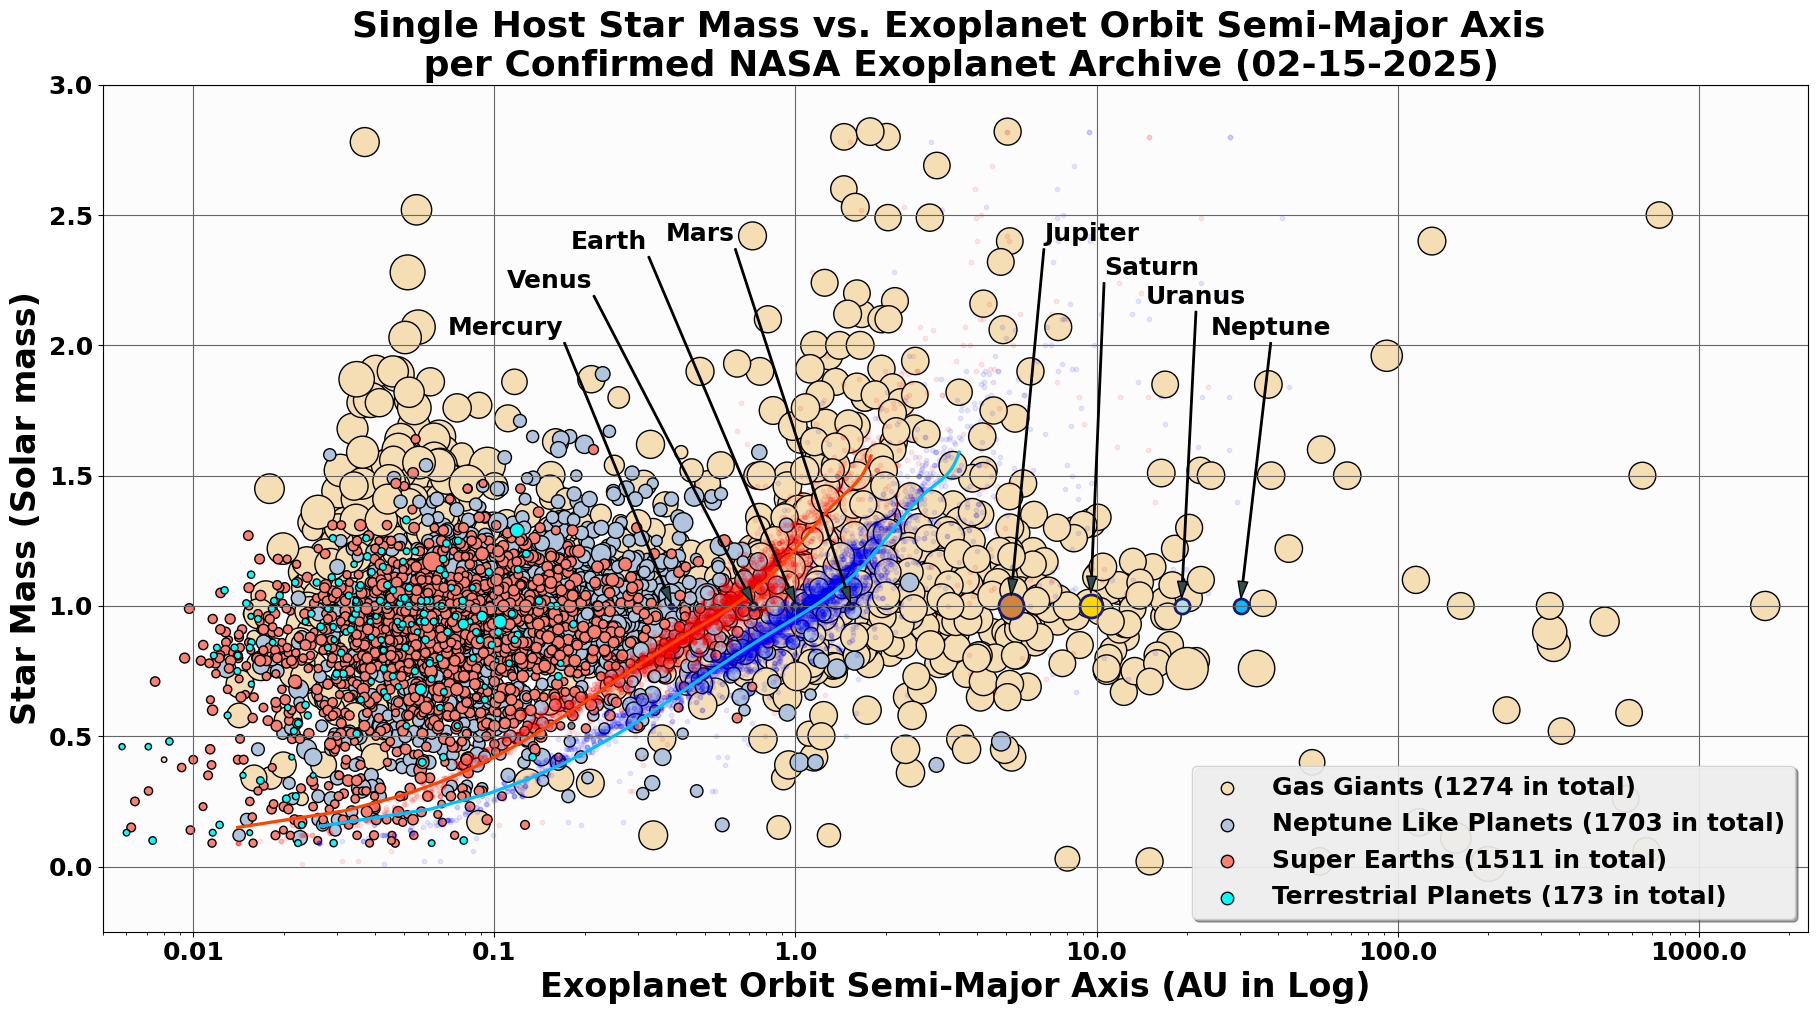

In [37]:
fig = plt.figure(figsize=(22,11))
ax = fig.add_subplot(111, facecolor='0.99', xscale='log')

ax.set_xlim(0.005, 2300)
ax.set_ylim(-0.25, 3)
ax.grid(color='0.4')
ax.set_title('Single Host Star Mass vs. Exoplanet Orbit Semi-Major Axis \n per Confirmed NASA Exoplanet Archive (02-15-2025)', fontweight ='bold')
ax.title.set_fontsize(26)
ax.set_xlabel('Exoplanet Orbit Semi-Major Axis (AU in Log)', fontweight ='bold')
ax.xaxis.label.set_fontsize(24)
ax.set_ylabel('Star Mass (Solar mass)', fontweight ='bold')
ax.yaxis.label.set_fontsize(24)

# Plot exoplanets
plot_exoplanets_with_size_and_label(ax=ax,
                                    exoplanets_data=st_mass_vs_pl_orbit_plot_data,
                                    x_field='pl_orbsmax',
                                    y_field='st_mass',
                                    size_field='pl_rade',
                                    type_field='pl_type',
                                    hz_status_field='pl_hz_status',
                                    scale_size=30,
                                    edgecolors='black',
                                    exoplanet_color_map=exoplanet_type_colors,
                                    exoplanet_label_map=exoplanet_type_labels)

# Plot habitable zone inner boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_inner',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_inner_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_inner_labels)

# Plot habitable zone outer boundaries
plot_exoplanet_hz_zones(ax=ax,
                        exoplanets_data=hz_zone_plot_data,
                        x_field='hz_zone_outer',
                        y_field='st_mass',
                        type_field='pl_type',
                        scale_size=10,
                        alpha=0.09,
                        exoplanet_color_map=exoplanet_type_with_hz_zone_outer_colors,
                        exoplanet_label_map=exoplanet_type_with_hz_zone_outer_labels)

# Plot Solar system planets
plot_exoplanets_with_size_only(ax=ax,
                               exoplanets_data=solar_system_planets_data,
                               x_field='pl_orbsmax',
                               y_field='st_mass',
                               size_field='pl_rade',
                               type_field='pl_type',
                               hz_status_field='pl_hz_status',
                               scale_size=30,
                               edgecolors='midnightblue',
                               linewidths=2,
                               exoplanet_color_map=solar_system_planets_colors,
                               exoplanet_label_map=solar_system_planets_labels)

# Labels for indicating Solar system planets
ax.annotate('Mercury', xy=(0.387, 1.01), xytext=(0.07, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Venus', xy=(0.723, 1.01), xytext=(0.11, 2.22),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Earth', xy=(1.0, 1.01), xytext=(0.18, 2.37),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Mars', xy=(1.524, 1.01), xytext=(0.37, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Jupiter', xy=(5.204, 1.04), xytext=(6.7, 2.40),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Saturn', xy=(9.573, 1.05), xytext=(10.6, 2.27),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Uranus', xy=(19.165, 1.03), xytext=(14.6, 2.16),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

ax.annotate('Neptune', xy=(30.178, 1.03), xytext=(23.96, 2.04),
            fontsize=18, fontweight='bold', color='black',
            arrowprops=dict(facecolor='darkslategray', width=1, headwidth=7, shrink=0))

# Fit the habitable zone inner boundary with curve
hz_inner_curve_fit_data = hz_zone_plot_data.loc[(hz_zone_plot_data['hz_zone_inner'] >= 0.01) & (hz_zone_plot_data['hz_zone_inner'] <=1.8)]
hz_inner_fit_curve_x, hz_inner_fit_curve_y, hz_inner_poly_coefs = fit_curve(curve_fit_data=hz_inner_curve_fit_data,
                                                                            x_filed='hz_zone_inner',
                                                                            y_field='st_mass',
                                                                            degree=5,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_inner_fit_curve_x, hz_inner_fit_curve_y, color='orangered', linewidth=2.3)

# Fit the habitable zone outer boundary with curve
hz_outer_curve_fit_data = hz_zone_plot_data.loc[(hz_zone_plot_data['hz_zone_outer'] >= 0.01) & (hz_zone_plot_data['hz_zone_outer'] <=3.5)]
hz_outer_fit_curve_x, hz_outer_fit_curve_y, hz_outer_poly_coefs = fit_curve(curve_fit_data=hz_outer_curve_fit_data,
                                                                            x_filed='hz_zone_outer',
                                                                            y_field='st_mass',
                                                                            degree=5,
                                                                            num_data_points_to_gen=100)
ax.plot(hz_outer_fit_curve_x, hz_outer_fit_curve_y, color='deepskyblue', linewidth=2.3)

ax.set_yticklabels(ax.get_yticks(), weight='bold', size=18)
ax.set_xticklabels(ax.get_xticks(), rotation=0, weight='bold', size=18)

legend_properties = {'size':18, 'weight':'bold'}
legend = ax.legend(scatterpoints=1,
                   labelcolor='black',
                   loc='lower right',
                   markerscale=2,
                   shadow=True,
                   framealpha=0.85,
                   prop=legend_properties)
set_legend_size(legend, len(exoplanet_type_labels), 80)

frame = legend.get_frame()
frame.set_facecolor('0.99')

print(f"The coeffients for the polynomial that fits with the habitable zone inner boundary is: {hz_inner_poly_coefs}.")
print(f"The coeffients for the polynomial that fits with the habitable zone outer boundary is: {hz_outer_poly_coefs}.")